In [1]:
import pandas

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

## Data Cleaning Utils

In [2]:
def normalize_colnames(df: pandas.DataFrame) -> pandas.DataFrame:
    rename_dict: dict[str, str] = {}

    for col in df.columns:
        if "text" in col:
            rename_dict[col] = "text"
        elif "label" in col:
            rename_dict[col] = "label"

    df = df.rename(columns=rename_dict)
    return df

In [3]:
def clean_colnames(df: pandas.DataFrame) -> pandas.DataFrame:
    clean_cols: list[str] = []

    for col in df.columns:
        clean_cols.append(col.lower().replace(" ", "_"))

    df.columns = clean_cols
    return df

In [4]:
def remove_ids(df: pandas.DataFrame) -> pandas.DataFrame:
    id_cols: list[str] = []

    for col in df.columns:
        if "id" in col:
            id_cols.append(col)

    df = df.drop(columns=id_cols)
    return df


## Colab-specific Utils

In [5]:
from google.colab import files

In [6]:
!mkdir -p data

In [ ]:
uploaded: dict[str, bytes] = files.upload("data")

## DEPSEV Dataset

In [8]:
depsev: pandas.DataFrame = pandas.read_csv("data/depsev.csv")

In [9]:
depsev.shape

(3553, 2)

In [10]:
depsev.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3553 non-null   object
 1   label   3553 non-null   object
dtypes: object(2)
memory usage: 2.3 MB


In [11]:
depsev.label.value_counts()

,count
label,
minimum,2587
moderate,394
mild,290
severe,282


In [12]:
minimum: pandas.DataFrame = depsev[depsev.label == "minimum"]
minimum.head()

,text,label
1,"Hey there r/assistance, Not sure if this is th...",minimum
2,My mom then hit me with the newspaper and it s...,minimum
6,It was a big company so luckily I didn't have ...,minimum
10,Next week I’ll be flying for our family vacati...,minimum
13,"No place in my city has shelter space for us, ...",minimum


In [13]:
label_map: dict[str, str] = {
    "minimum": "not depression",
    "mild": "moderate"
}

depsev.label = depsev.label.replace(label_map)
depsev.label.unique()

array(['moderate', 'not depression', 'severe'], dtype=object)

In [14]:
depsev.label.value_counts()

,count
label,
not depression,2587
moderate,684
severe,282


## DEPSIGN Dataset

In [15]:
depsign_1: pandas.DataFrame = pandas.read_csv("data/depsign_1.tsv", sep="\t")
depsign_2: pandas.DataFrame = pandas.read_csv("data/depsign_2.tsv", sep="\t")
depsign_3: pandas.DataFrame = pandas.read_csv("data/depsign_3.tsv", sep="\t")

### DEPSIGN 1

In [16]:
depsign_1.shape

(4496, 3)

In [17]:
depsign_1.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496 entries, 0 to 4495
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PID        4496 non-null   object
 1   Text data  4496 non-null   object
 2   Label      4496 non-null   object
dtypes: object(3)
memory usage: 6.1 MB


In [18]:
depsign_1.Label.value_counts()

,count
Label,
moderate,2306
not depression,1830
severe,360


In [19]:
depsign_1 = clean_colnames(depsign_1)
depsign_1.columns

Index(['pid', 'text_data', 'label'], dtype='object')

In [20]:
depsign_1 = normalize_colnames(depsign_1)
depsign_1.columns

Index(['pid', 'text', 'label'], dtype='object')

In [21]:
depsign_1 = remove_ids(depsign_1)
depsign_1.columns

Index(['text', 'label'], dtype='object')

### DEPSIGN 2

In [22]:
depsign_2.shape

(3245, 3)

In [23]:
depsign_2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pid           3245 non-null   object
 1   text data     3245 non-null   object
 2   Class labels  3245 non-null   object
dtypes: object(3)
memory usage: 4.4 MB


In [24]:
depsign_2["Class labels"].value_counts()

,count
Class labels,
moderate,2169
not depression,848
severe,228


In [25]:
depsign_2 = clean_colnames(depsign_2)
depsign_2.columns

Index(['pid', 'text_data', 'class_labels'], dtype='object')

In [26]:
depsign_2 = normalize_colnames(depsign_2)
depsign_2.columns

Index(['pid', 'text', 'label'], dtype='object')

In [27]:
depsign_2 = remove_ids(depsign_2)
depsign_2.columns

Index(['text', 'label'], dtype='object')

### DEPSIGN 3

In [28]:
depsign_3.shape

(8891, 3)

In [29]:
depsign_3.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PID        8891 non-null   object
 1   Text_data  8891 non-null   object
 2   Label      8891 non-null   object
dtypes: object(3)
memory usage: 10.7 MB


In [30]:
depsign_3.Label.value_counts()

,count
Label,
moderate,6019
not depression,1971
severe,901


In [31]:
depsign_3 = clean_colnames(depsign_3)
depsign_3.columns

Index(['pid', 'text_data', 'label'], dtype='object')

In [32]:
depsign_3 = normalize_colnames(depsign_3)
depsign_3.columns

Index(['pid', 'text', 'label'], dtype='object')

In [33]:
depsign_3 = remove_ids(depsign_3)
depsign_3.columns

Index(['text', 'label'], dtype='object')

### Merge DEPSIGN Datasets

In [34]:
depsign: pandas.DataFrame = pandas.concat([depsign_1, depsign_2, depsign_3], ignore_index=True)

In [35]:
depsign.shape

(16632, 2)

In [36]:
depsign.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16632 entries, 0 to 16631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16632 non-null  object
 1   label   16632 non-null  object
dtypes: object(2)
memory usage: 20.1 MB


In [37]:
depsign.label.value_counts()

,count
label,
moderate,10494
not depression,4649
severe,1489


In [38]:
depsign.to_csv("data/depsign.csv", index=False)

## Create the Final Dataset

In [39]:
depset: pandas.DataFrame = pandas.concat([depsev, depsign], ignore_index=True)

In [40]:
depset.shape

(20185, 2)

In [41]:
depset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20185 entries, 0 to 20184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20185 non-null  object
 1   label   20185 non-null  object
dtypes: object(2)
memory usage: 22.6 MB


In [42]:
depset.label.value_counts()

,count
label,
moderate,11178
not depression,7236
severe,1771


In [43]:
depset.to_csv("data/depset.csv", index=False)

## Final Cleaning Steps

### Check for NULL Values

In [ ]:
depset.isnull().sum()

,0
text,0
label,0


### Check for Duplicate Values

In [ ]:
depset.duplicated(subset=["text"]).sum()

np.int64(6417)

In [ ]:
duplicates = depset[depset.duplicated(subset=["text"])]
duplicates.label.value_counts()

,count
label,
moderate,4740
not depression,1124
severe,553


#### Drop Duplicate Values

In [ ]:
depset = depset.drop_duplicates(subset=["text"], keep="first")

In [ ]:
depset.duplicated(subset=["text"]).sum()

np.int64(0)

In [ ]:
depset.label.value_counts()

,count
label,
moderate,6438
not depression,6112
severe,1218


## Preprocessing

In [ ]:
!pip install contractions

In [ ]:
import contractions
import re

In [ ]:
def preprocessing(text: str) -> str:
    text = text.lower().strip()
    text = contractions.fix(text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub("\n", "", text)
    text = re.sub(r"([?!,+=—&%\'\";:|\(\){}\[\]/])", r" \1 ", text)
    text = re.sub("[ ]{2,}", " ", text).strip()

    return text

In [ ]:
depset.text = depset.text.apply(preprocessing)

## Model Training

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = depset.text
y = depset.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

### Class Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [ ]:
encoder.classes_

array(['moderate', 'not depression', 'severe'], dtype=object)

In [ ]:
y_train_encoded[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

### Cross-Validation Strategy

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

### Class Weights

In [ ]:
import numpy as np

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights

array([0.71288026, 0.75078391, 3.76933607])

In [ ]:
class_weights_dict = dict(zip(np.unique(y_train_encoded), class_weights))
class_weights_dict

{np.int64(0): np.float64(0.7128802588996763),
 np.int64(1): np.float64(0.7507839127471029),
 np.int64(2): np.float64(3.7693360711841204)}

### Machine Learning Models

#### TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), max_df=0.95, min_df=5)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Sentence Embeddings

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
X_train_embeddings = model.encode(X_train.tolist())
X_test_embeddings = model.encode(X_test.tolist())

#### Resampling

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train_tfidf_dense = X_train_tfidf.toarray()
X_train_embeddings_dense = X_train_embeddings

In [ ]:
smote = SMOTE(random_state=19)

X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf_dense, y_train_encoded)
X_train_embeddings_resampled, y_train_resampled = smote.fit_resample(X_train_embeddings_dense, y_train_encoded)

#### Apply Cross-Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, recall_score, precision_score

models = [
    ("Logistic Regression (TF-IDF)", LogisticRegression(C=1.0, penalty="l2", max_iter=1000, class_weight=class_weights_dict), X_train_tfidf_resampled, y_train_resampled),
    ("Linear SVC (TF-IDF)", LinearSVC(C=1.0, class_weight=class_weights_dict, max_iter=1000), X_train_tfidf_resampled, y_train_resampled),
    ("Random Forest (TF-IDF)", RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict, random_state=19), X_train_tfidf_resampled, y_train_resampled),

    ("Logistic Regression (Embeddings)", LogisticRegression(C=1.0, penalty="l2", max_iter=1000, class_weight=class_weights_dict), X_train_embeddings_resampled, y_train_resampled),
    ("Linear SVC (Embeddings)", LinearSVC(C=1.0, class_weight=class_weights_dict, max_iter=1000), X_train_embeddings_resampled, y_train_resampled),
    ("Random Forest (Embeddings)", RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict, random_state=19), X_train_embeddings_resampled, y_train_resampled),
]

scorings = {
    "accuracy": "accuracy",
    "f1": make_scorer(f1_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "precision": make_scorer(precision_score, average="weighted")
}

confusion_matrices = {}
results = {}

for name, model, X_train_vec, y_train_vec in models:
    print(f"\n{name} = {model.__class__.__name__}()")

    scores = cross_validate(model, X_train_vec, y_train_vec, cv=folds, scoring=scorings)

    accuracy = scores["test_accuracy"]
    f1 = scores["test_f1"]
    recall = scores["test_recall"]
    precision = scores["test_precision"]

    results[name] = {
        "Accuracy": accuracy.mean(),
        "F1": f1.mean(),
        "Recall": recall.mean(),
        "Precision": precision.mean()
    }

    print(f"Cross-validated Accuracy: {accuracy.mean():.4f} +/- {accuracy.std():.4f}")
    print(f"Cross-validated F1 Score: {f1.mean():.4f} +/- {f1.std():.4f}")
    print(f"Cross-validated Recall: {recall.mean():.4f} +/- {recall.std():.4f}")
    print(f"Cross-validated Precision: {precision.mean():.4f} +/- {precision.std():.4f}")

    y_pred = cross_val_predict(model, X_train_vec, y_train_vec, cv=folds)
    cm = confusion_matrix(y_train_vec, y_pred)
    confusion_matrices[name] = cm
    print(f"Confusion Matrix:\n{cm}")
    print("=" * 80)


Logistic Regression (TF-IDF) = LogisticRegression()
Cross-validated Accuracy: 0.6712 +/- 0.0067
Cross-validated F1 Score: 0.6506 +/- 0.0078
Cross-validated Recall: 0.6712 +/- 0.0067
Cross-validated Precision: 0.6820 +/- 0.0069
Confusion Matrix:
[[2044 1187 1919]
 [ 885 3287  978]
 [  56   55 5039]]

Linear SVC (TF-IDF) = LinearSVC()
Cross-validated Accuracy: 0.7184 +/- 0.0057
Cross-validated F1 Score: 0.7074 +/- 0.0065
Cross-validated Recall: 0.7184 +/- 0.0057
Cross-validated Precision: 0.7093 +/- 0.0065
Confusion Matrix:
[[2699 1509  942]
 [1280 3392  478]
 [  82   59 5009]]

Random Forest (TF-IDF) = RandomForestClassifier()
Cross-validated Accuracy: 0.7442 +/- 0.0043
Cross-validated F1 Score: 0.7480 +/- 0.0038
Cross-validated Recall: 0.7442 +/- 0.0043
Cross-validated Precision: 0.7542 +/- 0.0031
Confusion Matrix:
[[3494 1522  134]
 [1473 3586   91]
 [ 480  252 4418]]

Logistic Regression (Embeddings) = LogisticRegression()
Cross-validated Accuracy: 0.5727 +/- 0.0052
Cross-validated 

In [ ]:
results_df = pandas.DataFrame(results).T
confusion_matrices_df = pandas.DataFrame({name: cm.flatten() for name, cm in confusion_matrices.items()})

results_df.to_csv("model_results.csv", index=True)
confusion_matrices_df.to_csv("confusion_matrices.csv", index=True)

print("\nResults saved to model_results.csv")
print("Confusion Matrices saved to confusion_matrices.csv")


Results saved to model_results.csv
Confusion Matrices saved to confusion_matrices.csv


#### Load Results and Confusion Matrices

In [ ]:
model_results = pandas.read_csv("model_results.csv", index_col=0)
confusion_matrices = pandas.read_csv("confusion_matrices.csv", index_col=0)

In [ ]:
num_classes = len(encoder.classes_)
confusion_matrices = {
    col: confusion_matrices[col].values.reshape((num_classes, num_classes))
    for col in confusion_matrices.columns
}


In [ ]:
confusion_matrices

{'Logistic Regression (TF-IDF)': array([[2044, 1187, 1919],
        [ 885, 3287,  978],
        [  56,   55, 5039]]),
 'Linear SVC (TF-IDF)': array([[2699, 1509,  942],
        [1280, 3392,  478],
        [  82,   59, 5009]]),
 'Random Forest (TF-IDF)': array([[3494, 1522,  134],
        [1473, 3586,   91],
        [ 480,  252, 4418]]),
 'Logistic Regression (Embeddings)': array([[1036,  912, 3202],
        [ 590, 2868, 1692],
        [  78,  128, 4944]]),
 'Linear SVC (Embeddings)': array([[1498, 1028, 2624],
        [ 760, 3089, 1301],
        [ 179,  208, 4763]]),
 'Random Forest (Embeddings)': array([[3539, 1348,  263],
        [1544, 3537,   69],
        [ 275,  158, 4717]])}

#### Plot Confusion Matrices

In [ ]:
import math

In [ ]:
def plot_confusion_matrices(confusion_matrices, class_names):
    n = len(confusion_matrices)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    if rows == 1:
        axes = axes.reshape(1, -1)

    axes = axes.flatten()

    for i, (name, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        axes[i].set_title(name)
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [ ]:
class_names = encoder.classes_
class_names

array(['moderate', 'not depression', 'severe'], dtype=object)

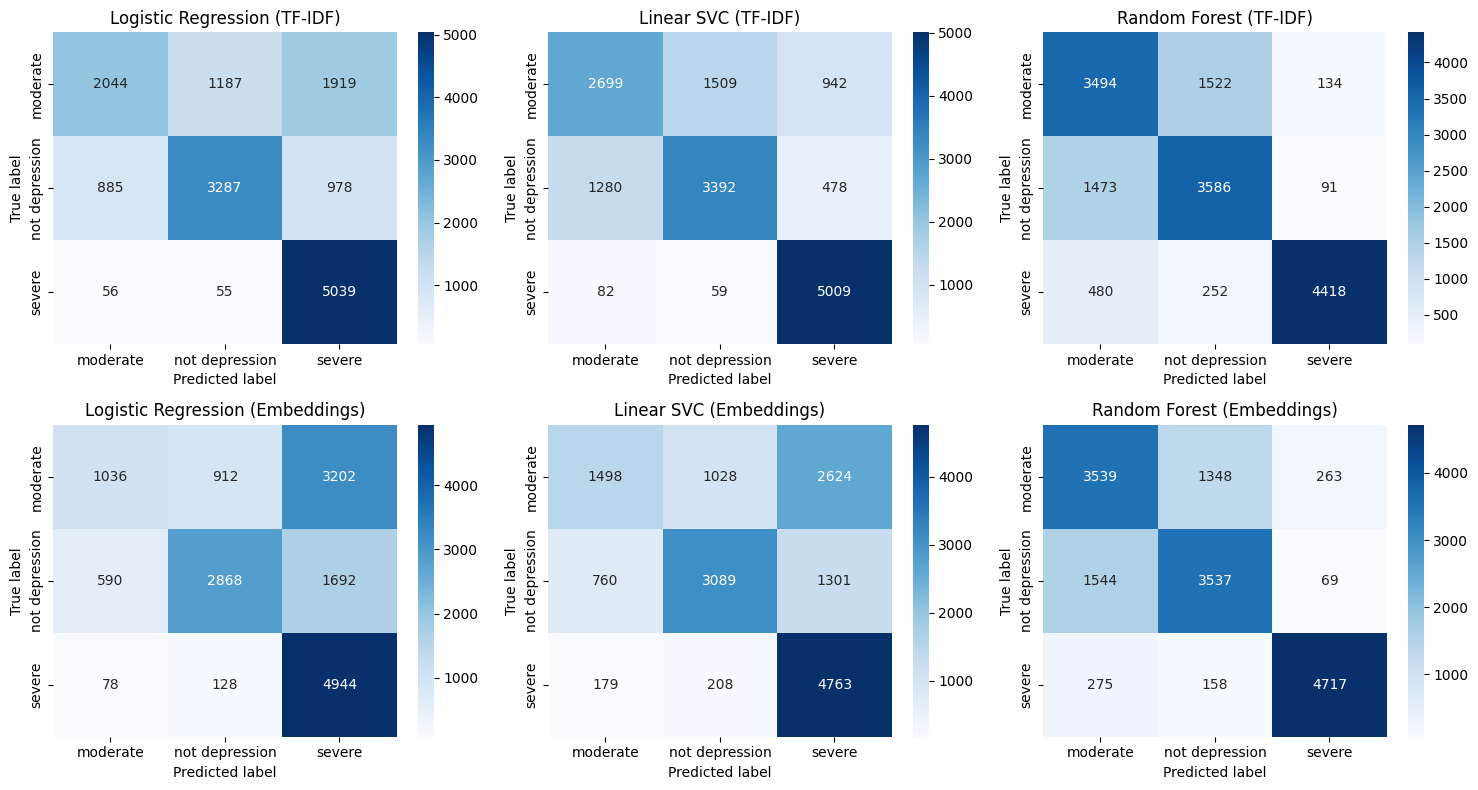

In [ ]:
plot_confusion_matrices(confusion_matrices, class_names)

#### Train the Best Model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict, random_state=19)
best_X_train = X_train_embeddings_resampled
best_y_train = y_train_resampled

best_model.fit(best_X_train, best_y_train)

y_pred_test = best_model.predict(X_test_embeddings)

y_test_encoded_pred = encoder.transform(y_test)

print("\nTest Set Performance:")
print(classification_report(y_test_encoded_pred, y_pred_test, target_names=encoder.classes_))

accuracy = accuracy_score(y_test_encoded_pred, y_pred_test)
print(f"Test Set Accuracy: {accuracy:.4f}")


Test Set Performance:
                precision    recall  f1-score   support

      moderate       0.64      0.70      0.67      1288
not depression       0.68      0.68      0.68      1222
        severe       0.45      0.22      0.29       244

      accuracy                           0.65      2754
     macro avg       0.59      0.53      0.55      2754
  weighted avg       0.64      0.65      0.64      2754

Test Set Accuracy: 0.6485


### Data Augumentation for Deep Learning

In [ ]:
!pip install nlpaug

In [ ]:
import nlpaug.augmenter.word as naw
import nltk
import numpy as np

In [ ]:
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

In [ ]:
augmenter = naw.SynonymAug(aug_src="wordnet", lang="eng")

In [ ]:
target_class = "severe"
target_class_index = list(encoder.classes_).index(target_class)
target_class_index

2

In [ ]:
X_train_list = X_train.tolist()
y_train_list = y_train_encoded.tolist()

In [ ]:
augmented_texts = []
augmented_labels = []

for text, label in zip(X_train_list, y_train_list):
    if label == target_class_index:
        try:
            for _ in range(4):
                aug_text = augmenter.augment(text)
                augmented_texts.append(aug_text)
                augmented_labels.append(label)
        except Exception as e:
            print(f"Skipping a sample due to error: {e}")

In [ ]:
X_train_augmented = X_train_list + augmented_texts
y_train_augmented = y_train_list + augmented_labels

In [ ]:
print(f"Original training size: {len(X_train_list)}")
print(f"Augmented severe class samples: {len(augmented_texts)}")
print(f"Total training size after augmentation: {len(X_train_augmented)}")

Original training size: 11014
Augmented severe class samples: 3896
Total training size after augmentation: 14910


In [ ]:
df_augmented = pandas.DataFrame({
    "text": X_train_augmented,
    "label": y_train_augmented
})

In [ ]:
df_augmented.to_csv("augmented_data_DL.csv", index=False)

### Deep Learning Models

#### Convert Labels to Categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [ ]:
y_train_categorical.shape

(11014, 3)

#### Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(tokenized_train, maxlen=100)

tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(tokenized_test, maxlen=100)

In [ ]:
vocabulary_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 26196


#### Load GloVe Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

In [ ]:
def load_glove_embeddings(file_path):
    embeddings_index = {}

    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = vector
            
    return embeddings_index

#### Create Embedding Matrices

In [ ]:
def create_embedding_matrix(tokenizer, embeddings_index, embedding_dim=100):
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
embedding_dim = 100

embedding_matrix_general = create_embedding_matrix(tokenizer, load_glove_embeddings("glove.6B.100d.txt"), embedding_dim)
embedding_matrix_twitter = create_embedding_matrix(tokenizer, load_glove_embeddings("glove.twitter.27B.100d.txt"), embedding_dim)

#### Build Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
def build_model(embedding_matrix, max_len, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                        output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix],
                        trainable=True))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-4))))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(1e-4))))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))

    model.build(input_shape=(None, max_len))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

##### General GloVe BiLSTM

In [ ]:
model_general = build_model(embedding_matrix_general, max_len=100, num_classes=3)
model_general.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     3,009,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,135,603 (11.96 MB)

 Trainable params: 3,135,347 (11.96 MB)

 Non-trainable params: 256 (1.00 KB)

##### Twitter GloVe BiLSTM

In [ ]:
model_twitter = build_model(embedding_matrix_twitter, max_len=100, num_classes=3)
model_twitter.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     3,009,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,135,603 (11.96 MB)

 Trainable params: 3,135,347 (11.96 MB)

 Non-trainable params: 256 (1.00 KB)

#### Plot Model Architecture

In [ ]:
!pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

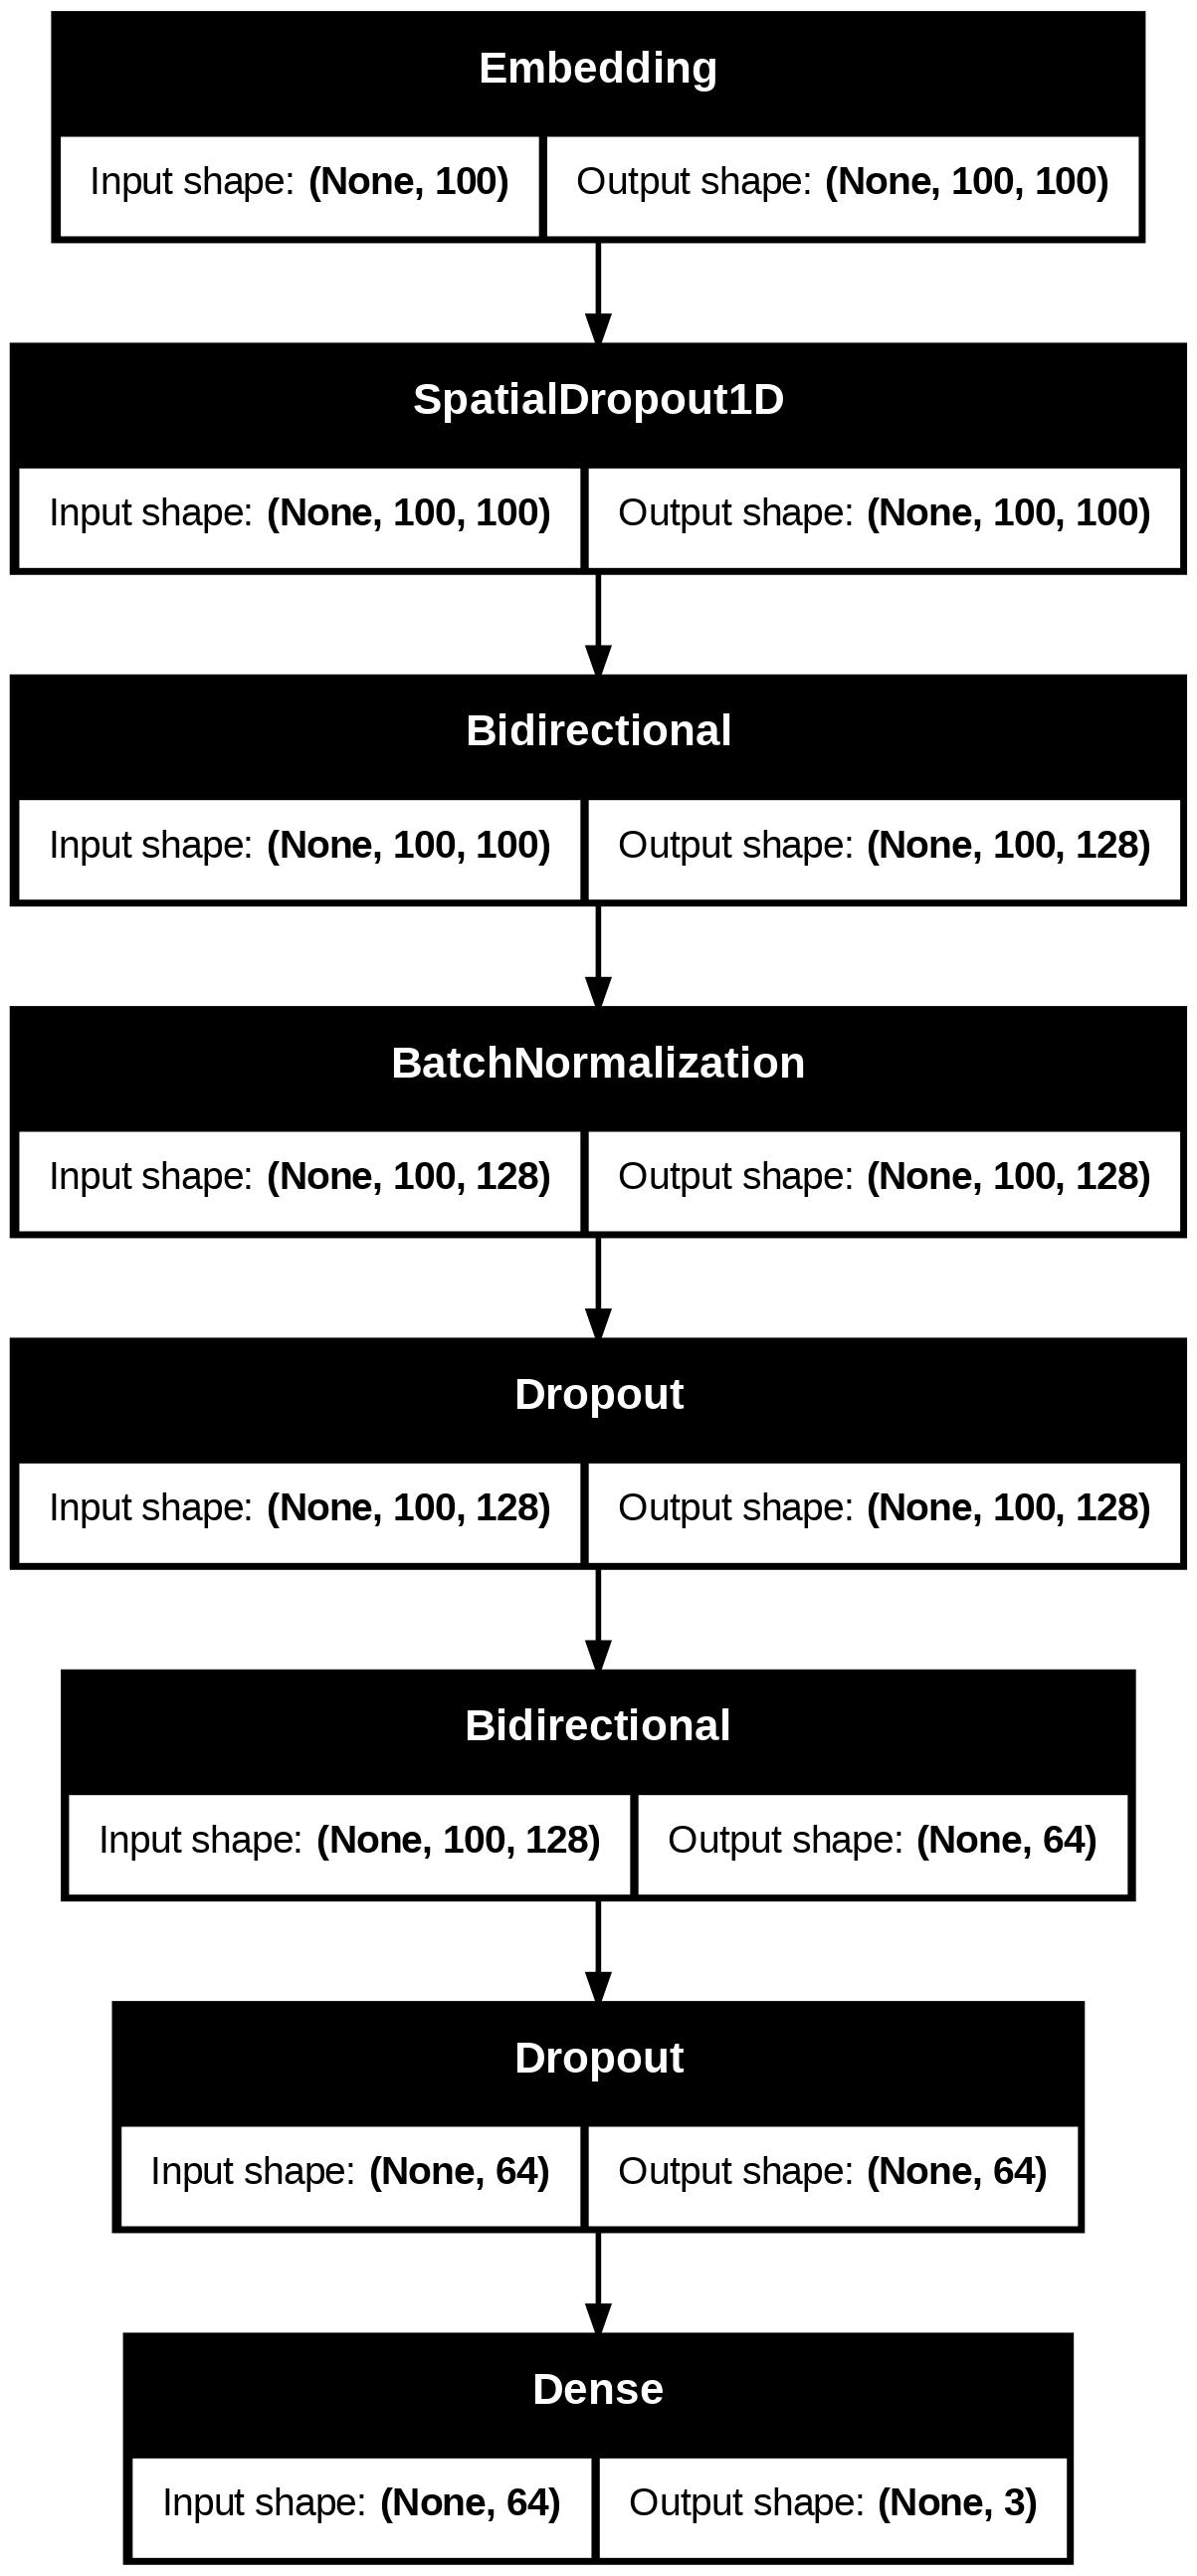

In [ ]:
plot_model(model_general, show_shapes=True)

#### Model Training

##### Training General GloVe Model

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [ ]:
model_general.fit(X_train_padded, y_train_categorical, epochs=20, batch_size=512, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.5009 - loss: 1.0476 - val_accuracy: 1.0000 - val_loss: 1.0153
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5948 - loss: 0.9204 - val_accuracy: 1.0000 - val_loss: 0.8796
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5940 - loss: 0.9031 - val_accuracy: 1.0000 - val_loss: 0.7529
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.6181 - loss: 0.8703 - val_accuracy: 1.0000 - val_loss: 0.6555
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6331 - loss: 0.8490 - val_accuracy: 1.0000 - val_loss: 0.4811
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6413 - loss: 0.8352 - val_accuracy: 1.0000 - val_loss: 0.2832
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6487 - loss: 0.8259 - val_accuracy: 1.0000 - val_loss: 0.2381
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6609 - loss: 0.8141 - val_accuracy: 1.0000 - val_loss:

##### Training Twitter GloVe Model

In [ ]:
model_twitter.fit(X_train_padded, y_train_categorical, epochs=20, batch_size=512, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.3595 - loss: 1.3466 - val_accuracy: 1.0000 - val_loss: 0.8325
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4565 - loss: 1.0966 - val_accuracy: 1.0000 - val_loss: 0.5808
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4781 - loss: 1.0622 - val_accuracy: 1.0000 - val_loss: 0.4291
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5086 - loss: 1.0265 - val_accuracy: 1.0000 - val_loss: 0.3796
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5042 - loss: 1.0120 - val_accuracy: 1.0000 - val_loss: 0.3002
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5390 - loss: 0.9853 - val_accuracy: 1.0000 - val_loss: 0.1221
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5439 - loss: 0.9653 - val_accuracy: 1.0000 - val_loss: 0.0862
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5491 - loss: 0.9605 - val_accuracy: 1.0000 - val_loss:

#### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate_model(model, X_test, y_test_categorical, encoder, model_name="Model"):
    y_pred_prob = model.predict(X_test)

    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_classes = np.argmax(y_test_categorical, axis=1)

    y_pred_labels = encoder.inverse_transform(y_pred_classes)
    y_true_labels = encoder.inverse_transform(y_true_classes)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true_labels, y_pred_labels, target_names=[str(cls) for cls in encoder.classes_]))

    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average="weighted")
    recall = recall_score(y_true_labels, y_pred_labels, average="weighted")
    f1 = f1_score(y_true_labels, y_pred_labels, average="weighted")

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
evaluate_model(model_general, X_test_padded, y_test_categorical, encoder, "General GloVe BiLSTM")

87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Classification Report for General GloVe BiLSTM:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68      1288
           1       0.73      0.56      0.63      1222
           2       0.35      0.03      0.06       244

    accuracy                           0.63      2754
   macro avg       0.55      0.47      0.46      2754
weighted avg       0.63      0.63      0.61      2754

Accuracy: 0.6333
Precision: 0.6282
Recall: 0.6333
F1 Score: 0.6056


{'accuracy': 0.6332607116920842,
 'precision': 0.6281902312547867,
 'recall': 0.6332607116920842,
 'f1': 0.6055503340353303}

In [ ]:
evaluate_model(model_twitter, X_test_padded, y_test_categorical, encoder, "Twitter GloVe BiLSTM")

87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step
Classification Report for Twitter GloVe BiLSTM:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      1288
           1       0.71      0.67      0.69      1222
           2       0.25      0.43      0.32       244

    accuracy                           0.61      2754
   macro avg       0.54      0.57      0.54      2754
weighted avg       0.64      0.61      0.62      2754

Accuracy: 0.6137
Precision: 0.6410
Recall: 0.6137
F1 Score: 0.6244


{'accuracy': 0.6136528685548294,
 'precision': 0.640951792092309,
 'recall': 0.6136528685548294,
 'f1': 0.6243579923893844}

### LLM-based Methods

### MLM distilBERT

In [ ]:
!pip install transformers datasets

In [ ]:
from transformers import DistilBertConfig, DistilBertForMaskedLM, DistilBertTokenizerFast, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict

In [ ]:
try:
    with open("corpus.txt", "r", encoding="utf-8") as f:
        lines = f.readlines()

    df_corpus = pandas.DataFrame(lines, columns=["text"])

except FileNotFoundError:
    print("Pre-train corpus not found. Upload the file first.")

In [ ]:
raw_dataset = Dataset.from_pandas(df_corpus)

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
config = DistilBertConfig.from_pretrained("distilbert-base-uncased")
model = DistilBertForMaskedLM.from_pretrained("distilbert-base-uncased", config=config)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=128)

In [ ]:
tokenized_dataset = raw_dataset.map(tokenize_function, batched=True, num_proc=4, remove_columns=["text"])

In [ ]:
train_dataset = DatasetDict({"train": tokenized_dataset})

In [ ]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [ ]:
training_args = TrainingArguments(
    output_dir="./mlm_results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    prediction_loss_only=True,
    report_to="none"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset["train"],
    data_collator=data_collator,
)

In [ ]:
print("Starting pre-training...")
trainer.train()
print("Pre-training finished.")

Starting pre-training...


Step,Training Loss
500,2.328400
1000,2.142400


Pre-training finished.


---

In [ ]:
trainer.save_model("./pre-trained-distilbert-mlm")

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, Trainer, TrainingArguments

In [ ]:
!pip install datasets transformers -U

In [ ]:
X_train_list = X_train.tolist()
y_train_list = [int(label) for label in y_train_encoded]

X_val_list = X_test.tolist()
y_val_list = [int(label) for label in y_test_encoded]

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained("./pre-trained-distilbert-mlm")
model = DistilBertForSequenceClassification.from_pretrained("./pre-trained-distilbert-mlm", num_labels=3)

In [ ]:
from datasets import Dataset, Features, ClassLabel, Value

In [ ]:
features = Features({
    "text": Value("string"),
    "label": ClassLabel(num_classes=3)
})

In [ ]:
train_ds = Dataset.from_dict({"text": X_train_list, "label": y_train_list}, features=features)
val_ds = Dataset.from_dict({"text": X_val_list, "label": y_val_list}, features=features)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

In [ ]:
train_ds = train_ds.map(tokenize_function, batched=True)
val_ds = val_ds.map(tokenize_function, batched=True)

train_ds = train_ds.remove_columns(["text"])
val_ds = val_ds.remove_columns(["text"])

Map:   0%|          | 0/11014 [00:00<?, ? examples/s]

Map:   0%|          | 0/2754 [00:00<?, ? examples/s]

In [ ]:
train_ds.set_format("numpy")
val_ds.set_format("numpy")

train_ds.set_format("torch")
val_ds.set_format("torch")

In [ ]:
training_args = TrainingArguments(
    output_dir="./distilbert-finetuned",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=6,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir="./logs",
    report_to="none",
)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.asarray(logits).argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.984434,0.640886,0.642355,0.644709,0.640886
2,0.291100,1.169390,0.653595,0.653304,0.653668,0.653595
3,0.190500,1.320630,0.655410,0.653344,0.658834,0.655410
4,0.190500,1.560002,0.654321,0.650366,0.663183,0.654321
5,0.105900,1.661265,0.660857,0.660262,0.661868,0.660857
6,0.067600,1.715694,0.664488,0.663537,0.666682,0.664488


TrainOutput(global_step=2070, training_loss=0.1603364856922684, metrics={'train_runtime': 799.4197, 'train_samples_per_second': 82.665, 'train_steps_per_second': 2.589, 'total_flos': 2188532921877504.0, 'train_loss': 0.1603364856922684, 'epoch': 6.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 1.7156940698623657,
 'eval_accuracy': 0.664488017429194,
 'eval_f1': 0.6635370866007028,
 'eval_precision': 0.6666822907563649,
 'eval_recall': 0.664488017429194,
 'eval_runtime': 8.5617,
 'eval_samples_per_second': 321.663,
 'eval_steps_per_second': 10.161,
 'epoch': 6.0}

In [ ]:
trainer.save_model("./distilbert-finetuned")
tokenizer.save_pretrained("./distilbert-finetuned")

('./distilbert-finetuned/tokenizer_config.json',
 './distilbert-finetuned/special_tokens_map.json',
 './distilbert-finetuned/vocab.txt',
 './distilbert-finetuned/added_tokens.json',
 './distilbert-finetuned/tokenizer.json')